In [21]:
# importing libs
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, GaussianNoise,Lambda
from keras.models import Model
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

In [22]:
# for reproducing reslut
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(3)

In [23]:
# defining parameters
M = 16
k = np.log2(M)
k = int(k)
print ('M:',M,'k:',k)
R = 1
n_channel = 7

M: 16 k: 4


In [24]:
#generating data of size N
N = 10000
label = np.random.randint(M,size=N)

In [25]:
# creating one hot encoded vectors
data = []
for i in label:
    temp = np.zeros(M)
    temp[i] = 1
    data.append(temp)

In [26]:
data = np.array(data)
print (data.shape)

(10000, 16)


In [27]:
temp_check = [17,23,45,67,89,96,72,250,350]
for i in temp_check:
    print(label[i],data[i])

9 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
4 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
13 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
3 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
9 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
7 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
12 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
15 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
12 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [28]:
def antirectifier(x):
    y = x/K.l2_normalize(x,axis=0)
    return y
def antirectifier_output_shape(input_shape):
    return input_shape

In [29]:

print (int(k/R))
input_signal = Input(shape=(M,))
encoded = Dense(M, activation='relu')(input_signal)
encoded1 = Dense(n_channel, activation='linear')(encoded)
encoded2 = Lambda(lambda x: (np.sqrt(n_channel)*x)/K.l2_normalize(x,axis=0))(encoded1)
#encoded2 = BatchNormalization()(encoded1)
EbNo_train =  7 # 5.01187 #  coverted 7 db of EbNo
encoded3 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded2)

decoded = Dense(M, activation='relu')(encoded3)
decoded1 = Dense(M, activation='softmax')(decoded)
autoencoder = Model(input_signal, decoded1)
adam = Adam(lr=0.001)
autoencoder.compile(optimizer=adam, loss='categorical_crossentropy')

4


In [30]:
print (autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 119       
_________________________________________________________________
lambda_4 (Lambda)            (None, 7)                 0         
_________________________________________________________________
gaussian_noise_4 (GaussianNo (None, 7)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                128       
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
Total para

In [31]:
N_val = 1500
val_label = np.random.randint(M,size=N_val)
val_data = []
for i in val_label:
    temp = np.zeros(M)
    temp[i] = 1
    val_data.append(temp)
val_data = np.array(val_data)

In [45]:
autoencoder.fit(data, data,
                epochs=700,
                batch_size=850,
                validation_data=(val_data, val_data))

Train on 10000 samples, validate on 1500 samples
Epoch 1/700
10000/10000 [==============================] - 0s - loss: 2.7748 - val_loss: 2.7791
Epoch 2/700
10000/10000 [==============================] - 0s - loss: 2.7779 - val_loss: 2.7813
Epoch 3/700
10000/10000 [==============================] - 0s - loss: 2.7783 - val_loss: 2.7797
Epoch 4/700
10000/10000 [==============================] - 0s - loss: 2.7764 - val_loss: 2.7715
Epoch 5/700
10000/10000 [==============================] - 0s - loss: 2.7723 - val_loss: 2.7697
Epoch 6/700
10000/10000 [==============================] - 0s - loss: 2.7709 - val_loss: 2.7709
Epoch 7/700
10000/10000 [==============================] - 0s - loss: 2.7708 - val_loss: 2.7706
Epoch 8/700
10000/10000 [==============================] - 0s - loss: 2.7708 - val_loss: 2.7703
Epoch 9/700
10000/10000 [==============================] - 0s - loss: 2.7706 - val_loss: 2.7710
Epoch 10/700
10000/10000 [==============================] - 0s - loss: 2.7699 - val_los

10000/10000 [==============================] - 0s - loss: 2.7700 - val_loss: 2.7698
Epoch 86/700
10000/10000 [==============================] - 0s - loss: 2.7699 - val_loss: 2.7694
Epoch 87/700
10000/10000 [==============================] - 0s - loss: 2.7704 - val_loss: 2.7692
Epoch 88/700
10000/10000 [==============================] - 0s - loss: 2.7689 - val_loss: 2.7692
Epoch 89/700
10000/10000 [==============================] - 0s - loss: 2.7697 - val_loss: 2.7693
Epoch 90/700
10000/10000 [==============================] - 0s - loss: 2.7681 - val_loss: 2.7689
Epoch 91/700
10000/10000 [==============================] - 0s - loss: 2.7685 - val_loss: 2.7690
Epoch 92/700
10000/10000 [==============================] - 0s - loss: 2.7690 - val_loss: 2.7694
Epoch 93/700
10000/10000 [==============================] - 0s - loss: 2.7701 - val_loss: 2.7691
Epoch 94/700
10000/10000 [==============================] - 0s - loss: 2.7697 - val_loss: 2.7692
Epoch 95/700
10000/10000 [=================

10000/10000 [==============================] - 0s - loss: 2.7691 - val_loss: 2.7693
Epoch 169/700
10000/10000 [==============================] - 0s - loss: 2.7702 - val_loss: 2.7691
Epoch 170/700
10000/10000 [==============================] - 0s - loss: 2.7693 - val_loss: 2.7692
Epoch 171/700
10000/10000 [==============================] - 0s - loss: 2.7691 - val_loss: 2.7695
Epoch 172/700
10000/10000 [==============================] - 0s - loss: 2.7687 - val_loss: 2.7687
Epoch 173/700
10000/10000 [==============================] - 0s - loss: 2.7685 - val_loss: 2.7693
Epoch 174/700
10000/10000 [==============================] - 0s - loss: 2.7693 - val_loss: 2.7696
Epoch 175/700
10000/10000 [==============================] - 0s - loss: 2.7682 - val_loss: 2.7697
Epoch 176/700
10000/10000 [==============================] - 0s - loss: 2.7684 - val_loss: 2.7694
Epoch 177/700
10000/10000 [==============================] - 0s - loss: 2.7703 - val_loss: 2.7692
Epoch 178/700
10000/10000 [=======

10000/10000 [==============================] - 0s - loss: 2.7688 - val_loss: 2.7693
Epoch 252/700
10000/10000 [==============================] - 0s - loss: 2.7686 - val_loss: 2.7694
Epoch 253/700
10000/10000 [==============================] - 0s - loss: 2.7687 - val_loss: 2.7696
Epoch 254/700
10000/10000 [==============================] - 0s - loss: 2.7689 - val_loss: 2.7698
Epoch 255/700
10000/10000 [==============================] - 0s - loss: 2.7693 - val_loss: 2.7699
Epoch 256/700
10000/10000 [==============================] - 0s - loss: 2.7674 - val_loss: 2.7699
Epoch 257/700
10000/10000 [==============================] - 0s - loss: 2.7692 - val_loss: 2.7695
Epoch 258/700
10000/10000 [==============================] - 0s - loss: 2.7700 - val_loss: 2.7697
Epoch 259/700
10000/10000 [==============================] - 0s - loss: 2.7691 - val_loss: 2.7699
Epoch 260/700
10000/10000 [==============================] - 0s - loss: 2.7697 - val_loss: 2.7695
Epoch 261/700
10000/10000 [=======

10000/10000 [==============================] - 0s - loss: 2.7691 - val_loss: 2.7698
Epoch 335/700
10000/10000 [==============================] - 0s - loss: 2.7698 - val_loss: 2.7703
Epoch 336/700
10000/10000 [==============================] - 0s - loss: 2.7682 - val_loss: 2.7694
Epoch 337/700
10000/10000 [==============================] - 0s - loss: 2.7689 - val_loss: 2.7698
Epoch 338/700
10000/10000 [==============================] - 0s - loss: 2.7696 - val_loss: 2.7695
Epoch 339/700
10000/10000 [==============================] - 0s - loss: 2.7686 - val_loss: 2.7688
Epoch 340/700
10000/10000 [==============================] - 0s - loss: 2.7689 - val_loss: 2.7694
Epoch 341/700
10000/10000 [==============================] - 0s - loss: 2.7699 - val_loss: 2.7691
Epoch 342/700
10000/10000 [==============================] - 0s - loss: 2.7693 - val_loss: 2.7695
Epoch 343/700
10000/10000 [==============================] - 0s - loss: 2.7692 - val_loss: 2.7692
Epoch 344/700
10000/10000 [=======

10000/10000 [==============================] - 0s - loss: 2.7681 - val_loss: 2.7699
Epoch 418/700
10000/10000 [==============================] - 0s - loss: 2.7678 - val_loss: 2.7696
Epoch 419/700
10000/10000 [==============================] - 0s - loss: 2.7696 - val_loss: 2.7700
Epoch 420/700
10000/10000 [==============================] - 0s - loss: 2.7698 - val_loss: 2.7701
Epoch 421/700
10000/10000 [==============================] - 0s - loss: 2.7700 - val_loss: 2.7700
Epoch 422/700
10000/10000 [==============================] - 0s - loss: 2.7690 - val_loss: 2.7698
Epoch 423/700
10000/10000 [==============================] - 0s - loss: 2.7697 - val_loss: 2.7697
Epoch 424/700
10000/10000 [==============================] - 0s - loss: 2.7695 - val_loss: 2.7696
Epoch 425/700
10000/10000 [==============================] - 0s - loss: 2.7689 - val_loss: 2.7697
Epoch 426/700
10000/10000 [==============================] - 0s - loss: 2.7695 - val_loss: 2.7698
Epoch 427/700
10000/10000 [=======

10000/10000 [==============================] - 0s - loss: 2.7684 - val_loss: 2.7700
Epoch 501/700
10000/10000 [==============================] - 0s - loss: 2.7682 - val_loss: 2.7700
Epoch 502/700
10000/10000 [==============================] - 0s - loss: 2.7677 - val_loss: 2.7698
Epoch 503/700
10000/10000 [==============================] - 0s - loss: 2.7695 - val_loss: 2.7694
Epoch 504/700
10000/10000 [==============================] - 0s - loss: 2.7698 - val_loss: 2.7696
Epoch 505/700
10000/10000 [==============================] - 0s - loss: 2.7700 - val_loss: 2.7703
Epoch 506/700
10000/10000 [==============================] - 0s - loss: 2.7691 - val_loss: 2.7702
Epoch 507/700
10000/10000 [==============================] - 0s - loss: 2.7693 - val_loss: 2.7700
Epoch 508/700
10000/10000 [==============================] - 0s - loss: 2.7701 - val_loss: 2.7697
Epoch 509/700
10000/10000 [==============================] - 0s - loss: 2.7689 - val_loss: 2.7703
Epoch 510/700
10000/10000 [=======

10000/10000 [==============================] - 0s - loss: 2.7701 - val_loss: 2.7698
Epoch 584/700
10000/10000 [==============================] - 0s - loss: 2.7687 - val_loss: 2.7700
Epoch 585/700
10000/10000 [==============================] - 0s - loss: 2.7683 - val_loss: 2.7699
Epoch 586/700
10000/10000 [==============================] - 0s - loss: 2.7702 - val_loss: 2.7699
Epoch 587/700
10000/10000 [==============================] - 0s - loss: 2.7700 - val_loss: 2.7702
Epoch 588/700
10000/10000 [==============================] - 0s - loss: 2.7692 - val_loss: 2.7696
Epoch 589/700
10000/10000 [==============================] - 0s - loss: 2.7694 - val_loss: 2.7697
Epoch 590/700
10000/10000 [==============================] - 0s - loss: 2.7687 - val_loss: 2.7696
Epoch 591/700
10000/10000 [==============================] - 0s - loss: 2.7704 - val_loss: 2.7697
Epoch 592/700
10000/10000 [==============================] - 0s - loss: 2.7699 - val_loss: 2.7700
Epoch 593/700
10000/10000 [=======

10000/10000 [==============================] - 0s - loss: 2.7694 - val_loss: 2.7697
Epoch 667/700
10000/10000 [==============================] - 0s - loss: 2.7684 - val_loss: 2.7701
Epoch 668/700
10000/10000 [==============================] - 0s - loss: 2.7686 - val_loss: 2.7702
Epoch 669/700
10000/10000 [==============================] - 0s - loss: 2.7698 - val_loss: 2.7695
Epoch 670/700
10000/10000 [==============================] - 0s - loss: 2.7688 - val_loss: 2.7699
Epoch 671/700
10000/10000 [==============================] - 0s - loss: 2.7686 - val_loss: 2.7697
Epoch 672/700
10000/10000 [==============================] - 0s - loss: 2.7693 - val_loss: 2.7700
Epoch 673/700
10000/10000 [==============================] - 0s - loss: 2.7693 - val_loss: 2.7700
Epoch 674/700
10000/10000 [==============================] - 0s - loss: 2.7682 - val_loss: 2.7702
Epoch 675/700
10000/10000 [==============================] - 0s - loss: 2.7691 - val_loss: 2.7703
Epoch 676/700
10000/10000 [=======

In [33]:
from keras.models import load_model
#autoencoder.save('2_2_symbol_autoencoder_v_best.model')

In [34]:
#autoencoder_loaded = load_model('4_7_symbol_autoencoder_v_best.model')

In [35]:
encoder = Model(input_signal, encoded2)

In [36]:
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [37]:
N = 5000
test_label = np.random.randint(M,size=N)
test_data = []

for i in test_label:
    temp = np.zeros(M)
    temp[i] = 1
    test_data.append(temp)
    
test_data = np.array(test_data)

In [38]:
temp_test = 6
print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])

1.0 15


In [39]:
autoencoder
print (test_data[0])
print (encoder.predict(test_data))

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 7.00924444  8.4808836   5.3249526  ...,  6.38384104  5.0617547
   6.28501701]
 [ 7.00924492  8.4808836   5.32495165 ...,  6.38384056  5.0617547
   6.28501701]
 [ 7.0092454   8.48088264  5.32495213 ...,  6.38384104  5.0617547
   6.28501701]
 ..., 
 [ 2.22688723  5.27301121  2.53556347 ...,  0.28781193  3.56332684
   4.10871553]
 [ 2.22688723  5.27301121  2.53556347 ...,  0.28781191  3.56332707
   4.10871553]
 [ 2.22688699  5.27301121  2.53556323 ...,  0.28781191  3.56332707
   4.10871553]]


In [40]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [41]:
EbNodB_range = list(frange(-2,10.5,0.5))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = np.argmax(pred_final_signal,axis=1)
    no_errors = (pred_output != test_label)
    no_errors =  no_errors.astype(int).sum()
    ber[n] = no_errors / nn 
    print ('SNR:',EbNodB_range[n],'BER:',ber[n])

SNR: -2 BER: 0.9062
SNR: -1.5 BER: 0.9034
SNR: -1.0 BER: 0.9022
SNR: -0.5 BER: 0.907
SNR: 0.0 BER: 0.9022
SNR: 0.5 BER: 0.9032
SNR: 1.0 BER: 0.898
SNR: 1.5 BER: 0.8974
SNR: 2.0 BER: 0.8954
SNR: 2.5 BER: 0.9024
SNR: 3.0 BER: 0.8966
SNR: 3.5 BER: 0.8952
SNR: 4.0 BER: 0.8976
SNR: 4.5 BER: 0.898
SNR: 5.0 BER: 0.8904
SNR: 5.5 BER: 0.8986
SNR: 6.0 BER: 0.8952
SNR: 6.5 BER: 0.8984
SNR: 7.0 BER: 0.8956
SNR: 7.5 BER: 0.8908
SNR: 8.0 BER: 0.896
SNR: 8.5 BER: 0.8926
SNR: 9.0 BER: 0.8936
SNR: 9.5 BER: 0.8956
SNR: 10.0 BER: 0.892


In [42]:
import matplotlib.pyplot as plt
from scipy import interpolate
plt.plot(EbNodB_range, ber, 'bo',label='Autoencoder(2,2)')
#tck = interpolate.splrep(EbNodB_range, ber, s=0)
#xnew = np.arange(-2,8.8, 0.6)
#ynew = interpolate.splev(xnew, tck, der=0)
#plt.plot(xnew,ynew,'y')
#plt.plot(list(EbNodB_range), ber_theory, 'ro-',label='BPSK BER')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)

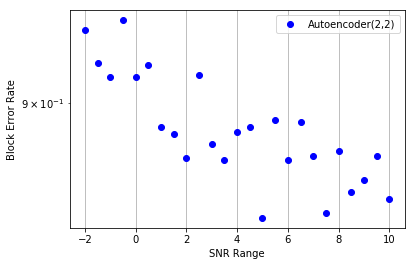

In [43]:
plt.savefig('AutoEncoder_2_2_BER_matplotlib')
plt.show()

In [44]:
print (encoder.predict(np.expand_dims([0,0,0,1],axis=0)))
print (encoder.predict(np.expand_dims([0,0,1,0],axis=0)))
print (encoder.predict(np.expand_dims([0,1,0,0],axis=0)))
print (encoder.predict(np.expand_dims([1,0,0,0],axis=0)))

ValueError: Error when checking : expected input_4 to have shape (None, 16) but got array with shape (1, 4)